In [2]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
import pickle

## Vision

### Random feature network (RFN) full MNIST

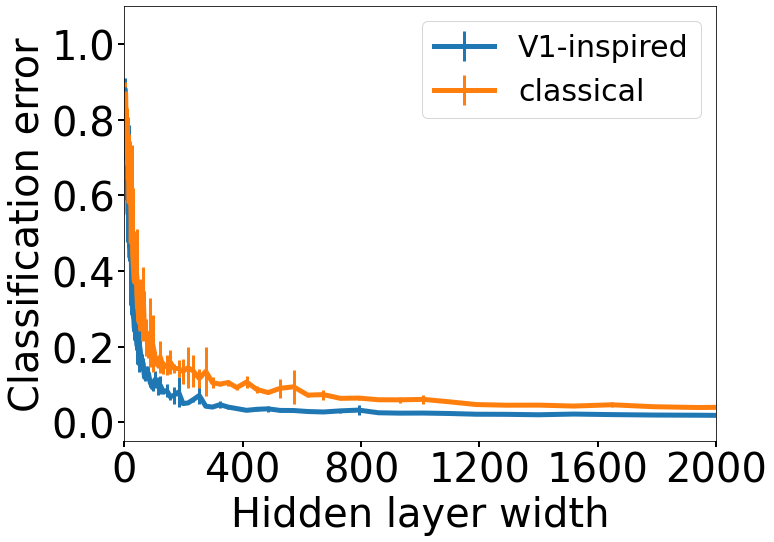

In [14]:
n_features = sorted(set(np.logspace(0, 3.5, 100).astype('int')))
t, l = 5, 2
with open('results/mnist_clf/mnist_clf_t=%0.2f_l=%0.2f_svc.pickle' % (t, l), 'rb') as handle:
    results = pickle.load(handle)
    
fig = plt.figure(figsize=(10.6, 8))
ax = fig.add_subplot(111)
ax.errorbar(n_features, results['V1']['avg_test_err'], yerr=results['V1']['std_test_err'], fmt='-', 
            label='V1-inspired',  markersize=4, lw=5, elinewidth=3)
ax.errorbar(n_features, results['classical']['avg_test_err'], yerr=results['classical']['std_test_err'], 
            fmt='-', label='classical', markersize=4, lw=5, elinewidth=3)
plt.xlabel('Hidden layer width', fontsize=40)
plt.ylabel('Classification error', fontsize=40)
plt.xlim([0, 2000])
plt.yticks(np.arange(0, 1.01, 0.2))
plt.ylim([-0.05, 1.1])
plt.xticks(np.arange(0, 2200, 400))
ax.tick_params(axis = 'both', which = 'major', labelsize = 40, width=2, length=6)

plt.legend(loc = 'upper right', fontsize=30)
plt.savefig('results/mnist_clf/mnist_clf_t=%0.2f_l=%0.2f.png' % (t, l))

### RFN kMNIST

V1 test err: 0.084, RF test err: 0.175


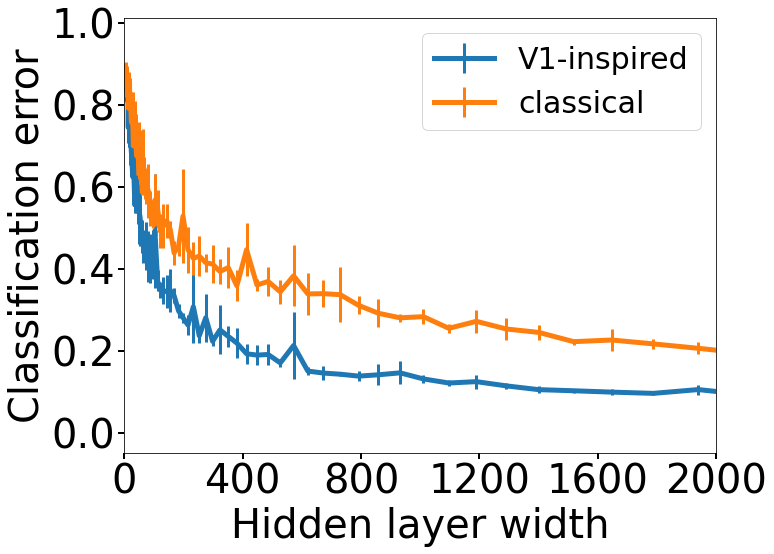

In [167]:
n_features = sorted(set(np.logspace(0, 3.5, 100).astype('int')))
t, l = 5, 2
with open('results/kmnist_clf/kmnist_clf_t=%0.2f_l=%0.3f.pickle' % (t, l), 'rb') as handle:
    results = pickle.load(handle)
    
fig = plt.figure(figsize=(10.6, 8))
ax = fig.add_subplot(111)
ax.errorbar(n_features, results['V1']['avg_test_err'], yerr=results['V1']['std_test_err'], fmt='-', 
            label='V1-inspired',  markersize=4, lw=5, elinewidth=3)
ax.errorbar(n_features, results['classical']['avg_test_err'], yerr=results['classical']['std_test_err'], 
            fmt='-', label='classical', markersize=4, lw=5, elinewidth=3)
plt.xlabel('Hidden layer width', fontsize=40)
plt.ylabel('Classification error', fontsize=40)
plt.xlim([0, 2000])
plt.yticks(np.arange(0, 1.1, 0.2))
plt.ylim([-0.05, 1.01])
plt.xticks(np.arange(0, 2200, 400))
ax.tick_params(axis = 'both', which = 'major', labelsize = 40, width=2, length=6)

plt.legend(loc = 'upper right', fontsize=30)
# plt.savefig('results/mnist_clf/mnist_clf_t=%0.2f_l=%0.2f.png' % (t, l))
print('V1 test err: %0.3f, RF test err: %0.3f' % (results['V1']['avg_test_err'][-1], results['classical']['avg_test_err'][-1]))

### RFN fewshot MNIST

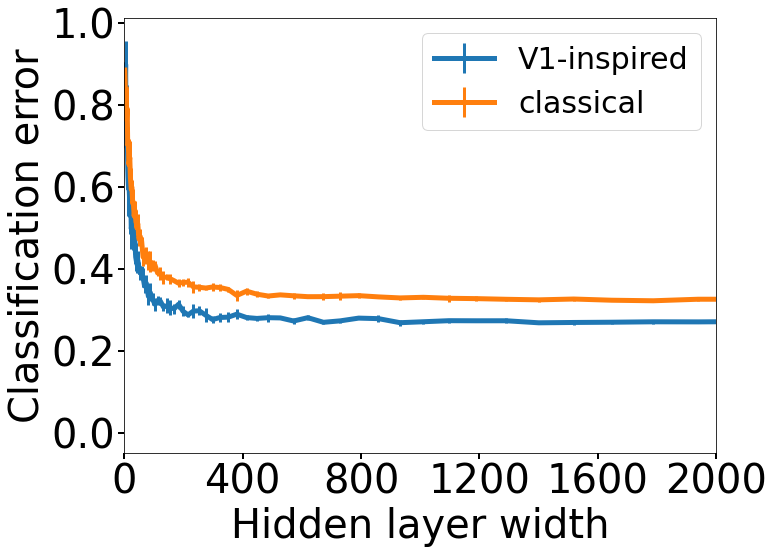

In [22]:
with open('results/mnist_clf/mnist_clf_t=%0.2f_l=%0.3f_few_shot_svc.pickle' % (t, l), 'rb') as handle:
    results = pickle.load(handle)

fig = plt.figure(figsize=(10.6, 8))
ax = fig.add_subplot(111)
ax.errorbar(n_features, results['V1']['avg_test_err'], yerr=results['V1']['std_test_err'], fmt='-', 
            label='V1-inspired',  markersize=4, lw=5, elinewidth=3)
ax.errorbar(n_features, results['classical']['avg_test_err'], yerr=results['classical']['std_test_err'], 
            fmt='-', label='classical', markersize=4, lw=5, elinewidth=3)
plt.xlabel('Hidden layer width', fontsize=40)
plt.ylabel('Classification error', fontsize=40)
plt.xlim([0, 2000])
plt.yticks(np.arange(0, 1.1, 0.2))
plt.ylim([-0.05, 1.01])
plt.xticks(np.arange(0, 2200, 400))
ax.tick_params(axis = 'both', which = 'major', labelsize = 40, width=2, length=6)
plt.legend(loc = 'upper right', fontsize=30)

print

### RFN fewshot MNIST

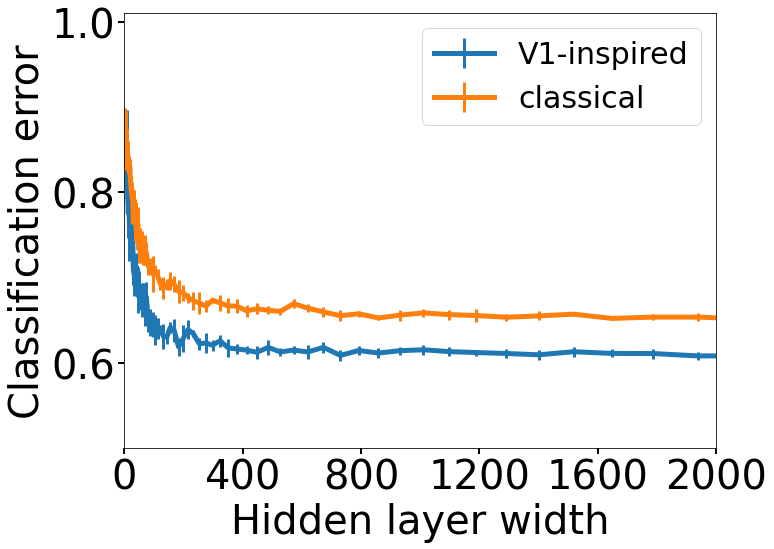

In [162]:
with open('results/kmnist_clf/kmnist_clf_t=%0.2f_l=%0.3f_few_shot.pickle' % (t, l), 'rb') as handle:
    results = pickle.load(handle)

fig = plt.figure(figsize=(10.6, 8))
ax = fig.add_subplot(111)
ax.errorbar(n_features, results['V1']['avg_test_err'], yerr=results['V1']['std_test_err'], fmt='-', 
            label='V1-inspired',  markersize=4, lw=5, elinewidth=3)
ax.errorbar(n_features, results['classical']['avg_test_err'], yerr=results['classical']['std_test_err'], 
            fmt='-', label='classical', markersize=4, lw=5, elinewidth=3)
plt.xlabel('Hidden layer width', fontsize=40)
plt.ylabel('Classification error', fontsize=40)
plt.xlim([0, 2000])
plt.yticks(np.arange(0, 1.1, 0.2))
plt.ylim([0.5, 1.01])
plt.xticks(np.arange(0, 2200, 400))
ax.tick_params(axis = 'both', which = 'major', labelsize = 40, width=2, length=6)

plt.legend(loc = 'upper right', fontsize=30)

# plt.savefig('results/mnist_clf/mnist_clf_t=%0.2f_l=%0.2f_fewshot.png' % (t, l))

### Initialize fully trained network full MNIST

V1, 2.2470
He, 3.4730


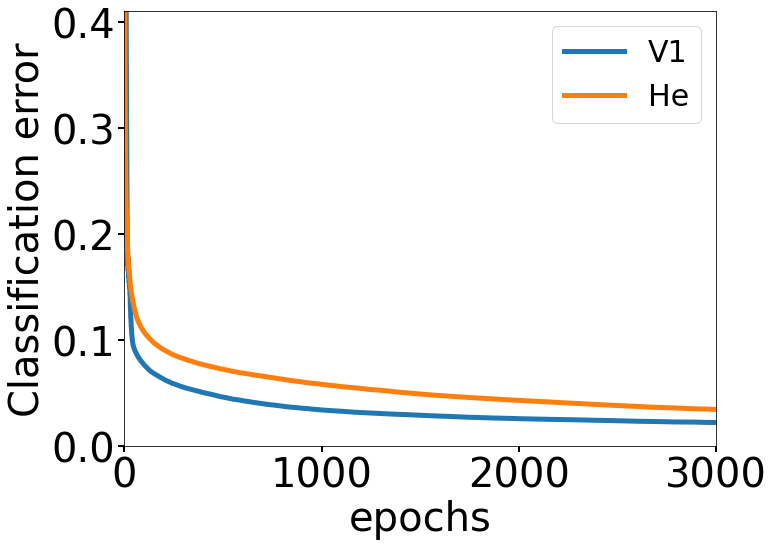

In [123]:
h, lr, n_epochs = 1000, 0.1, 3001
t, l = 5, 2
models = {'V1', 'He'}
with open('results/initialize_mnist/full_data/clf_t=%0.2f_l=%0.2f.pickle' % (t, l), 'rb') as handle:
    sims = pickle.load(handle)
    
fig = plt.figure(figsize=(10.6, 8))
ax = fig.add_subplot(111)
for m in models:
    avg_test_err = np.mean(sims['test_err'][m][h][lr], axis=0)
    std_test_err = np.std(sims['test_err'][m][h][lr], axis=0)
    plt.plot(np.arange(n_epochs), avg_test_err, label=m, markersize=5, lw=5)
    plt.fill_between(np.arange(n_epochs), avg_test_err - std_test_err, avg_test_err + std_test_err, alpha=0.2)
    print('%s, %0.4f' % (m, avg_test_err[-1] * 100))

plt.xlabel('epochs', fontsize=40)
plt.ylabel('Classification error', fontsize=40)
plt.yticks(np.arange(0, 1.01, 0.1))
plt.xticks(np.arange(0, 3001, 1000))
plt.xlim([0, 3001])
plt.ylim([0, 0.41])
ax.tick_params(axis = 'both', which = 'major', labelsize = 40, width=2, length=6)
plt.legend(loc = 'upper right', fontsize=30)
    
#     plt.yscale('log')
    

### Initialize fully trained network full kMNIST

V1, 9.9520
He, 13.4490


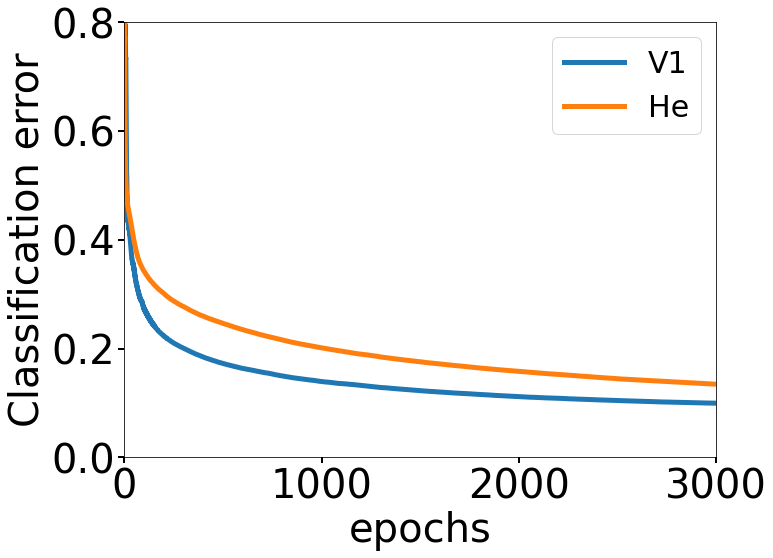

In [127]:
h, lr, n_epochs = 1000, 0.1, 3001
t, l = 5, 2
models = {'V1', 'He'}
with open('results/initialize_kmnist/full_data/clf_t=%0.2f_l=%0.2f.pickle' % (t, l), 'rb') as handle:
    sims = pickle.load(handle)
    
fig = plt.figure(figsize=(10.6, 8))
ax = fig.add_subplot(111)
for m in models:
    avg_test_err = np.mean(sims['test_err'][m][h][lr], axis=0)
    std_test_err = np.std(sims['test_err'][m][h][lr], axis=0)
    plt.plot(np.arange(n_epochs), avg_test_err, label=m, lw=5)
    plt.fill_between(np.arange(n_epochs), avg_test_err - std_test_err, avg_test_err + std_test_err, alpha=0.2)
    print('%s, %0.4f' % (m, avg_test_err[-1] * 100))

plt.xlabel('epochs', fontsize=40)
plt.ylabel('Classification error', fontsize=40)
plt.yticks(np.arange(0, 1.01, 0.2))
plt.xticks(np.arange(0, 3001, 1000))
plt.xlim([0, 3001])
plt.ylim([0, 0.8])
ax.tick_params(axis = 'both', which = 'major', labelsize = 40, width=2, length=6)
plt.legend(loc = 'upper right', fontsize=30)
# plt.yscale('log')

### Initialize fully trained network on fewshot MNIST

V1, 26.7890
He, 31.3110


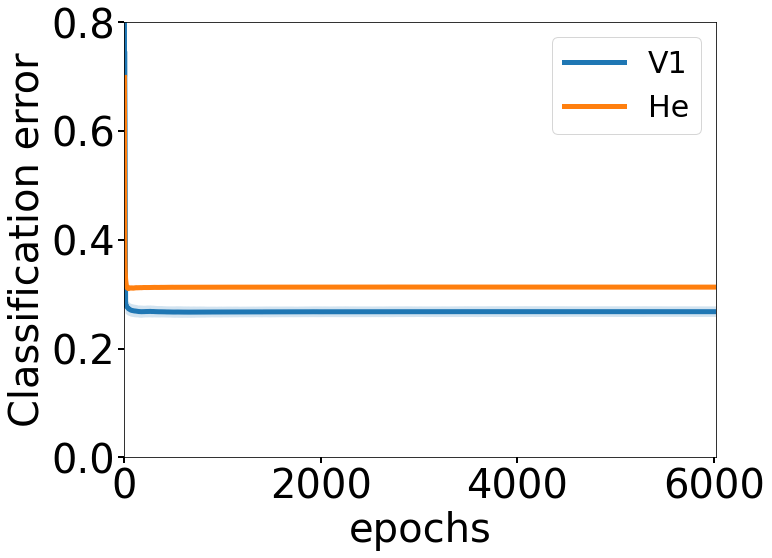

In [145]:
h, lr, n_epochs = 1000, 0.1, 7001
t, l = 5, 2
models = {'V1', 'He'}
with open('results/initialize_mnist/fewshot_data/clf_t=%0.2f_l=%0.2f.pickle' % (t, l), 'rb') as handle:
    sims = pickle.load(handle)
    
fig = plt.figure(figsize=(10.6, 8))
ax = fig.add_subplot(111)
for m in models:
    avg_test_err = np.mean(sims['test_err'][m][h][lr], axis=0)
    std_test_err = np.std(sims['test_err'][m][h][lr], axis=0)
    plt.plot(np.arange(n_epochs), avg_test_err, label=m, lw=5)
    plt.fill_between(np.arange(n_epochs), avg_test_err - std_test_err, avg_test_err + std_test_err, alpha=0.2)
    print('%s, %0.4f' % (m, avg_test_err[-1] * 100))
    
plt.xlabel('epochs', fontsize=40)
plt.ylabel('Classification error', fontsize=40)
plt.yticks(np.arange(0, 1.01, 0.2))
plt.xticks(np.arange(0, 7001, 2000))
plt.xlim([0, 6020])
plt.ylim([0, 0.8])
ax.tick_params(axis = 'both', which = 'major', labelsize = 40, width=2, length=6)
plt.legend(loc = 'upper right', fontsize=30)
# plt.yscale('log')

### Initialize fully trained network on fewshot kMNIST

V1, 60.3940
He, 63.1080


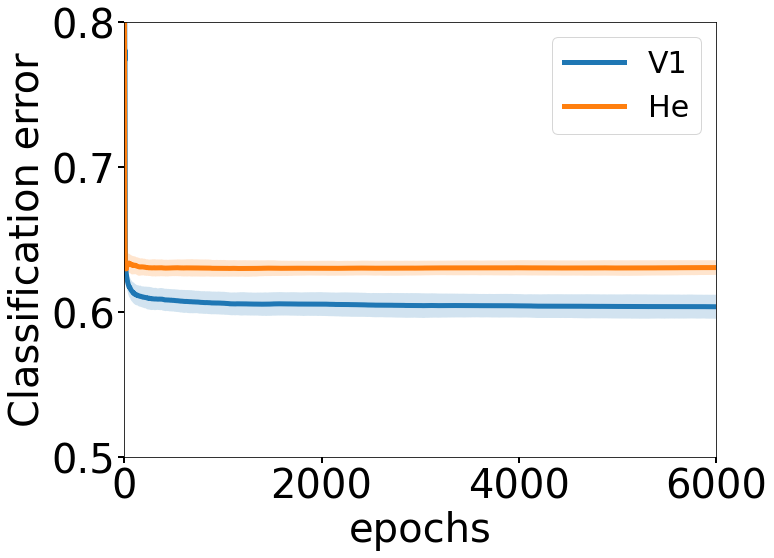

In [159]:
h, lr, n_epochs = 1000, 0.1, 7001
t, l = 5, 2
models = {'V1', 'He'}
with open('results/initialize_kmnist/fewshot_data/clf_t=%0.2f_l=%0.2f.pickle' % (t, l), 'rb') as handle:
    sims = pickle.load(handle)
    
fig = plt.figure(figsize=(10.6, 8))
ax = fig.add_subplot(111)
for m in models:
    avg_test_err = np.mean(sims['test_err'][m][h][lr], axis=0)
    std_test_err = np.std(sims['test_err'][m][h][lr], axis=0)
    plt.plot(np.arange(n_epochs), avg_test_err, label=m, lw=5)
    plt.fill_between(np.arange(n_epochs), avg_test_err - std_test_err, avg_test_err + std_test_err, alpha=0.2)
    print('%s, %0.4f' % (m, avg_test_err[-1] * 100))
    
plt.xlabel('epochs', fontsize=40)
plt.ylabel('Classification error', fontsize=40)
plt.yticks(np.arange(0, 1.01, 0.1))
plt.xticks(np.arange(0, 7001, 2000))
plt.xlim([0, 6001])
plt.ylim([0.5, 0.8])
ax.tick_params(axis = 'both', which = 'major', labelsize = 40, width=2, length=6)
plt.legend(loc = 'upper right', fontsize=30)
# plt.yscale('log')   

### Initialize fully trained network full fashion MNIST

V1, 12.0090
He, 13.1190


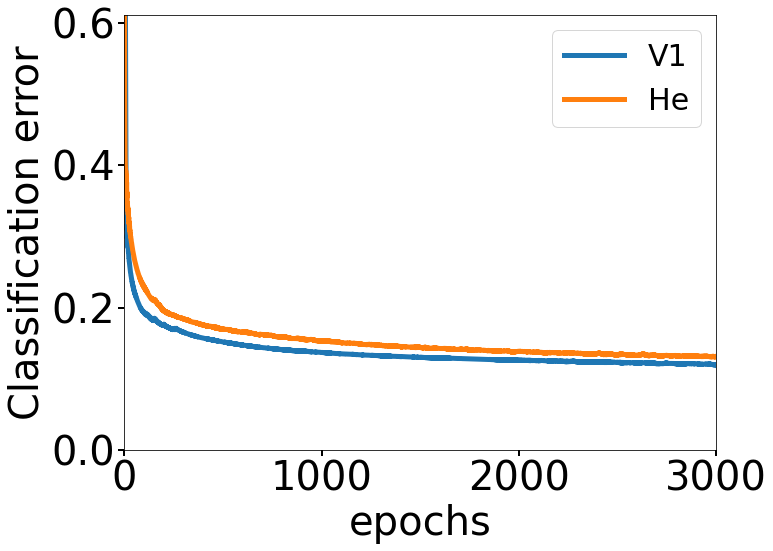

In [160]:
h, lr, n_epochs = 1000, 0.1, 3001
t, l = 5, 2
models = {'V1', 'He'}
with open('results/initialize_fashion_mnist/full_data/clf_t=%0.2f_l=%0.2f.pickle' % (t, l), 'rb') as handle:
    sims = pickle.load(handle)
    
fig = plt.figure(figsize=(10.6, 8))
ax = fig.add_subplot(111)
for m in models:
    avg_test_err = np.mean(sims['test_err'][m][h][lr], axis=0)
    std_test_err = np.std(sims['test_err'][m][h][lr], axis=0)
    plt.plot(np.arange(n_epochs), avg_test_err, label=m, lw=5)
    plt.fill_between(np.arange(n_epochs), avg_test_err - std_test_err, avg_test_err + std_test_err, alpha=0.2)
    print('%s, %0.4f' % (m, avg_test_err[-1] * 100))
    
plt.xlabel('epochs', fontsize=40)
plt.ylabel('Classification error', fontsize=40)
plt.yticks(np.arange(0, 1.01, 0.2))
plt.xticks(np.arange(0, 3001, 1000))
plt.xlim([0, 3001])
plt.ylim([0, 0.61])
ax.tick_params(axis = 'both', which = 'major', labelsize = 40, width=2, length=6)
plt.legend(loc = 'upper right', fontsize=30)
# plt.yscale('log')